In [2]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt



In [3]:


path21 = "2021sample.csv"
path24 = "savant_data (1).csv"
def load_data(path):
    df = pd.read_csv(path)
    return df

In [25]:
load_data(path24)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FC,2024-05-18,93.4,-0.29,6.28,"Smith, Will",669257,668933,field_out,hit_into_play,...,3,3,0,Standard,Standard,206.0,-0.009,-0.337,65.369387,7.31887
1,FC,2024-05-18,93.2,-0.50,6.29,"Smith, Will",669257,668933,NaN,called_strike,...,3,3,0,Standard,Standard,208.0,0.000,-0.030,NaN,NaN
2,SI,2024-05-18,92.8,-0.67,5.98,"Smith, Will",669257,668933,NaN,ball,...,3,3,0,Standard,Standard,216.0,0.000,0.074,NaN,NaN
3,FC,2024-05-18,92.6,-0.27,6.31,"Smith, Will",669257,668933,NaN,ball,...,3,3,0,Standard,Standard,202.0,0.000,0.046,NaN,NaN
4,SL,2024-05-18,87.6,-0.56,6.10,"Smith, Will",669257,668933,NaN,ball,...,3,3,0,Standard,Standard,48.0,0.000,0.028,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,FF,2024-05-12,96.4,1.86,5.76,"Wong, Connor",657136,669022,NaN,ball,...,0,0,0,Standard,Strategic,154.0,0.000,0.115,NaN,NaN
24996,SI,2024-05-12,95.0,-1.39,5.93,"Sabol, Blake",666165,593423,field_out,hit_into_play,...,0,0,3,Infield shade,Standard,219.0,-0.015,-0.158,73.268276,6.99910
24997,SI,2024-05-12,89.9,-0.63,6.46,"Bader, Harrison",664056,693821,NaN,called_strike,...,0,0,1,Standard,Standard,203.0,0.000,-0.076,NaN,NaN
24998,SI,2024-05-12,96.9,-1.69,5.34,"Doyle, Brenton",686668,642546,NaN,ball,...,2,2,1,Strategic,Standard,235.0,0.000,0.440,NaN,NaN


In [4]:
def clean_data(df):
    df.replace(['None', 'NaN'], pd.NA, inplace=True)
    df[['on_3b','on_2b','on_1b']] = df[['on_3b','on_2b','on_1b']].notna().astype(int)
    df = df.dropna(subset= ['zone'])
    df['inzone'] = np.where((df['zone'] >=1) & (df['zone'] <= 9),1,0)
    df = df.drop(df.columns[0],axis = 1)
    df['description'].unique().tolist()
    remove_descrips = ['pitchout','foul_bunt','bunt_foul_tip','hit_by_pitch','missed_bunt']
    df = df[~df['description'].isin(remove_descrips)]
    df['description'].unique().tolist()
    swing_descs = ['swinging_strike','hit_into_play','foul','foul_tip','swinging_strike_blocked']
    df['swing'] = np.where((df['description'].isin(swing_descs)),1,0)
    df['count'] = df.apply(lambda row: f"{row['balls']}-{row['strikes']}",axis = 1)
    df['runners'] = df[['on_1b','on_2b','on_3b']].sum(axis=1)
    return df

data24 = clean_data(load_data(path24))
data24

,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,...,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,inzone,swing,count,runners
0,2024-05-18,93.4,-0.29,6.28,"Smith, Will",669257,668933,field_out,hit_into_play,NaN,...,Standard,206.0,-0.009,-0.337,65.369387,7.31887,1,1,3-1,1
1,2024-05-18,93.2,-0.50,6.29,"Smith, Will",669257,668933,NaN,called_strike,NaN,...,Standard,208.0,0.000,-0.030,NaN,NaN,1,0,3-0,1
2,2024-05-18,92.8,-0.67,5.98,"Smith, Will",669257,668933,NaN,ball,NaN,...,Standard,216.0,0.000,0.074,NaN,NaN,0,0,2-0,1
3,2024-05-18,92.6,-0.27,6.31,"Smith, Will",669257,668933,NaN,ball,NaN,...,Standard,202.0,0.000,0.046,NaN,NaN,0,0,1-0,1
4,2024-05-18,87.6,-0.56,6.10,"Smith, Will",669257,668933,NaN,ball,NaN,...,Standard,48.0,0.000,0.028,NaN,NaN,0,0,0-0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,2024-05-12,96.4,1.86,5.76,"Wong, Connor",657136,669022,NaN,ball,NaN,...,Strategic,154.0,0.000,0.115,NaN,NaN,1,0,2-1,0
24996,2024-05-12,95.0,-1.39,5.93,"Sabol, Blake",666165,593423,field_out,hit_into_play,NaN,...,Standard,219.0,-0.015,-0.158,73.268276,6.99910,1,1,0-0,0
24997,2024-05-12,89.9,-0.63,6.46,"Bader, Harrison",664056,693821,NaN,called_strike,NaN,...,Standard,203.0,0.000,-0.076,NaN,NaN,1,0,3-1,1
24998,2024-05-12,96.9,-1.69,5.34,"Doyle, Brenton",686668,642546,NaN,ball,NaN,...,Standard,235.0,0.000,0.440,NaN,NaN,0,0,2-2,3


In [5]:
def create_strike_subset(df):
    two_strike = df[df['strikes'] == 2]
    return two_strike
def create_outzone_subset(df):
    out_of_zone = df[df['inzone'] == 0]
    return out_of_zone
out_zone = create_outzone_subset(clean_data(load_data(path21)))
out_zone
df = clean_data(load_data(path21))   
df

/tmp/ipykernel_840/2250979496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inzone'] = np.where((df['zone'] >=1) & (df['zone'] <= 9),1,0)
/tmp/ipykernel_840/2250979496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inzone'] = np.where((df['zone'] >=1) & (df['zone'] <= 9),1,0)


,pitch_type,release_speed,zone,stand,p_throws,description,type,bb_type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,inzone,swing,count,runners
0,SI,94.2,13.0,L,R,ball,B,NaN,1,1,1,1,1,1,3,0,0,1-1,3
1,CU,75.6,4.0,R,R,swinging_strike,S,NaN,0,0,0,1,0,2,1,1,1,0-0,1
2,FF,89.7,6.0,R,L,called_strike,S,NaN,3,0,0,0,0,2,4,1,0,3-0,0
3,FF,93.0,2.0,R,R,hit_into_play,X,line_drive,1,2,0,0,1,2,6,1,1,1-2,1
4,SI,92.2,12.0,R,R,called_strike,S,NaN,2,2,0,0,0,0,5,0,0,2-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,SL,87.4,5.0,R,R,foul,S,NaN,0,0,0,0,1,1,1,1,1,0-0,1
49996,CH,79.2,9.0,R,R,hit_into_play,X,ground_ball,3,2,1,0,1,2,9,1,1,3-2,2
49997,FF,95.3,2.0,L,R,hit_into_play,X,line_drive,0,1,0,0,0,2,2,1,1,0-1,0
49998,FF,94.7,4.0,R,R,called_strike,S,NaN,3,0,0,0,1,2,4,1,0,3-0,1


In [27]:



def swing_reg(df):
    """
    Runs a logistic regression on swing rate predicted on runners, strikes, outs, and balls.
    Then prints the summary 
    """
    result = df['swing']
    predictors = df[['runners','strikes','outs_when_up','balls']]
    model = sm.Logit(result,predictors).fit(cov_type = 'HC1')
    print(model.summary())
def protect_plate_reg(df):
    """
    Runs a logistic regression on swing rate predicted on runners, strikes, outs, and balls.
    Then prints the summary 
    Only looks at pitches that are out of the zone
    """
    balls_sub = create_outzone_subset(df)
    result = balls_sub['swing']
    predictors = balls_sub[['runners','strikes','outs_when_up','balls']]
    model = sm.Logit(result,predictors).fit(cov_type = 'HC1')
    print(model.summary())
swing_reg(clean_data(load_data(path21)))
protect_plate_reg(clean_data(load_data(path21)))

/tmp/ipykernel_840/2250979496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inzone'] = np.where((df['zone'] >=1) & (df['zone'] <= 9),1,0)


Optimization terminated successfully.
         Current function value: 0.677682
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  swing   No. Observations:                49700
Model:                          Logit   Df Residuals:                    49696
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 May 2024   Pseudo R-squ.:                 0.02064
Time:                        05:51:02   Log-Likelihood:                -33681.
converged:                       True   LL-Null:                       -34391.
Covariance Type:                  HC1   LLR p-value:                1.682e-307
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
runners         -0.0433      0.011     -3.796      0.000      -0.066      -0.021
strikes          0.3024

/tmp/ipykernel_840/2250979496.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inzone'] = np.where((df['zone'] >=1) & (df['zone'] <= 9),1,0)


Optimization terminated successfully.
         Current function value: 0.630939
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  swing   No. Observations:                25376
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                            3
Date:                Wed, 22 May 2024   Pseudo R-squ.:                -0.06348
Time:                        05:51:04   Log-Likelihood:                -16011.
converged:                       True   LL-Null:                       -15055.
Covariance Type:                  HC1   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
runners         -0.1953      0.018    -11.125      0.000      -0.230      -0.161
strikes          0.0707

In [7]:
## Plots
# swing percentage by number of outs, runners, and strikes
# swing percentage on different counts
# maybe add in bat speed based on number of strikes
# pitching
## percentage of pitches thrown in the zone based on count
## pitch selection based on count

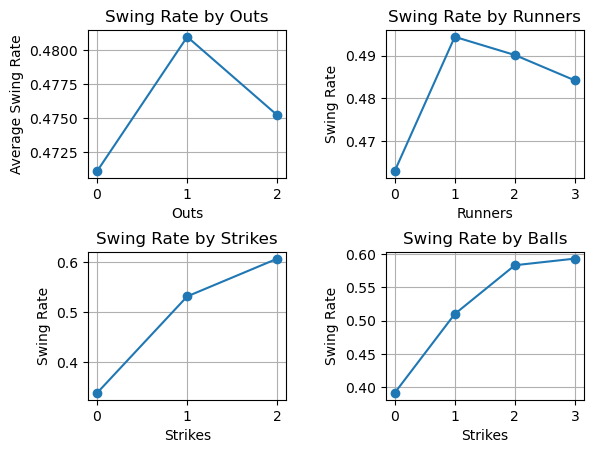

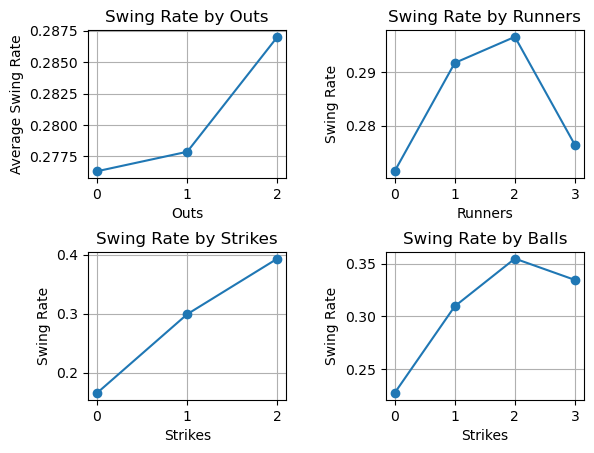

In [8]:
def create_subplots(df):
    grouped_outs = df.groupby('outs_when_up')['swing'].mean().reset_index()
    grouped_strikes = df.groupby('strikes')['swing'].mean().reset_index()
    grouped_runners = df.groupby('runners')['swing'].mean().reset_index()
    grouped_balls = df.groupby('balls')['swing'].mean().reset_index()
    
    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    
    ax1.plot(grouped_outs['outs_when_up'], grouped_outs['swing'], marker='o', linestyle='-')
    ax1.set_xlabel('Outs')
    ax1.set_ylabel('Average Swing Rate')
    ax1.set_title('Swing Rate by Outs')
    ax1.grid(True)
    
    ax2.plot(grouped_runners['runners'], grouped_runners['swing'], marker='o', linestyle='-')
    ax2.set_xlabel('Runners')
    ax2.set_ylabel('Swing Rate')
    ax2.set_title('Swing Rate by Runners')
    ax2.grid(True)
    
    ax3.plot(grouped_strikes['strikes'], grouped_strikes['swing'], marker='o', linestyle='-')
    ax3.set_xlabel('Strikes')
    ax3.set_ylabel('Swing Rate')
    ax3.set_title('Swing Rate by Strikes')
    ax3.grid(True)
    
    ax4.plot(grouped_balls['balls'], grouped_balls['swing'], marker='o', linestyle='-')
    ax4.set_xlabel('Strikes')
    ax4.set_ylabel('Swing Rate')
    ax4.set_title('Swing Rate by Balls')
    ax4.grid(True)
    
    fig.subplots_adjust(hspace = 0.5,wspace = 0.5)
    

create_subplots(df)
create_subplots(out_zone)

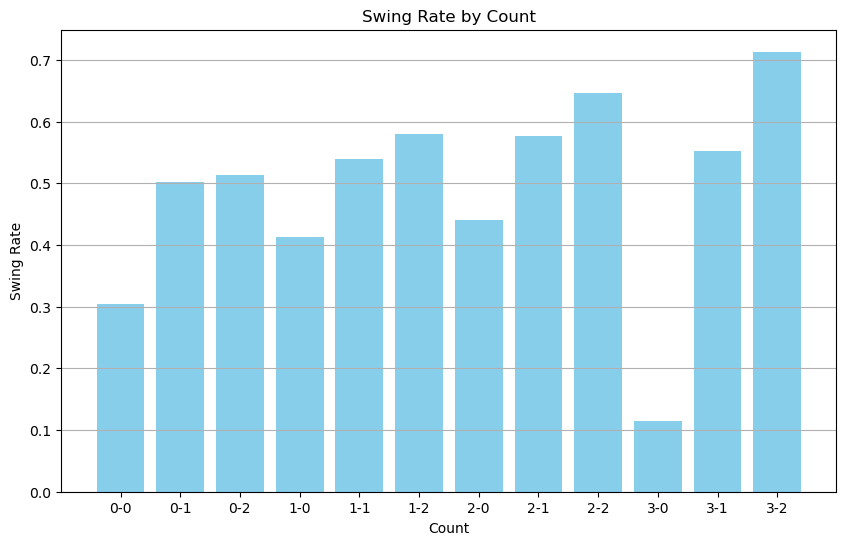

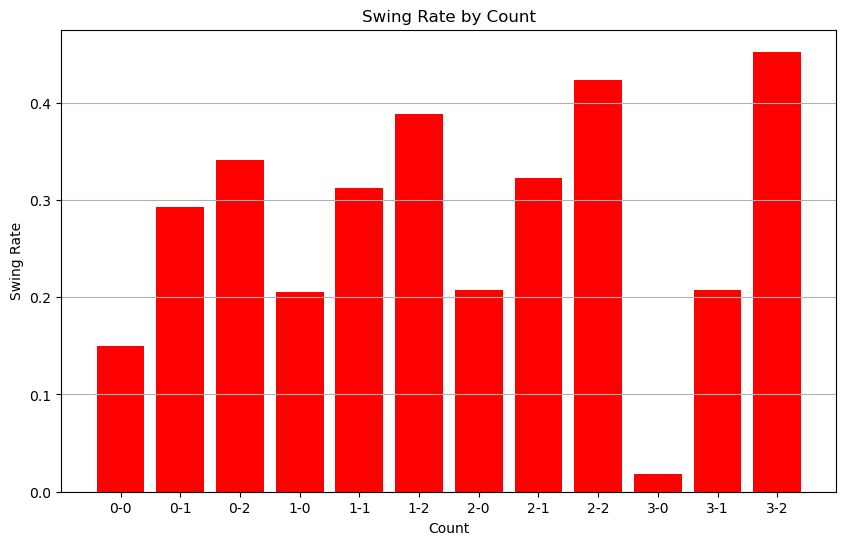

In [9]:
def create_count_plot(df,color = 'skyblue'):
    """
    Creates and displays a plot that shows the average swing rate for each different count
    """
    grouped_count = df.groupby('count')['swing'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.bar(grouped_count['count'], grouped_count['swing'], color=color)
    
    
    plt.xlabel('Count')
    plt.ylabel('Swing Rate')
    plt.title('Swing Rate by Count')
    plt.grid(axis='y')
    
    
    plt.show()
create_count_plot(df)
create_count_plot(out_zone, 'red')

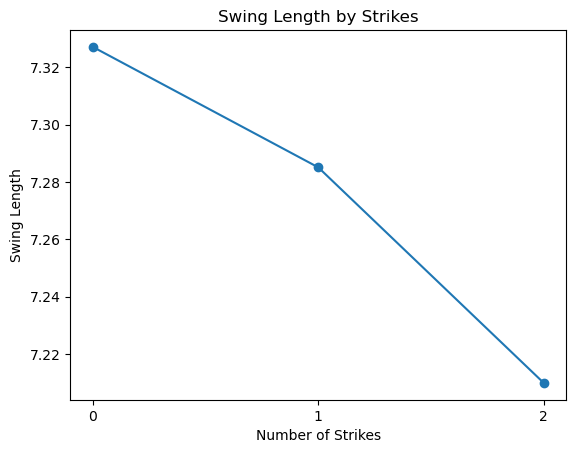

In [10]:
#swing length plot and regression
swings24 = data24[data24['swing'] == 1]
groupby_strike = swings24.groupby('strikes')['swing_length'].mean().reset_index()
plt.plot(groupby_strike['strikes'],groupby_strike['swing_length'],marker = 'o')
plt.xlabel('Number of Strikes')
plt.ylabel('Swing Length')
plt.title('Swing Length by Strikes')
plt.xticks(groupby_strike['strikes'])
def create_swing_length_plot(df):
    """
    Creates a plot comparing swing length and number of strikes
    """
    swings24 = df[df['swing'] == 1]
    groupby_strike = swings24.groupby('strikes')['swing_length'].mean().reset_index()
    plt.plot(groupby_strike['strikes'],groupby_strike['swing_length'],marker = 'o')
    plt.xlabel('Number of Strikes')
    plt.ylabel('Swing Length')
    plt.title('Swing Length by Strikes')
    plt.xticks(groupby_strike['strikes'])
    plt.show()
#reg
def swing_length_reg(df):
    swings24 = df[df['swing'] == 1]
    result = swings24['swing_length']
    preds = swings24['strikes']
    model = sm.ols(result,preds).fit(cov_type = 'HC1')

In [24]:
swings24 = data24[data24['swing'] == 1]
swings24 = swings24.dropna(subset= ['swing_length'])
y = swings24['swing_length']
x = swings24['strikes']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit(cov_type = 'HC1')
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           swing_length   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     34.29
Date:                Wed, 22 May 2024   Prob (F-statistic):           4.88e-09
Time:                        05:27:26   Log-Likelihood:                -15053.
No. Observations:               11589   AIC:                         3.011e+04
Df Residuals:                   11587   BIC:                         3.012e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3337      0.014    540.185      0.000       7.307       7.360
strikes       -0.0595      0.010     -5.856      0.000      -0.079      -0.040
==============================================================================
Omnibus:                      108.790   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.953
Skew:                          -0.233   Prob(JB):                     4.89e-25
Kurtosis:                       3.119   Cond. No.                         3.23
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""